# What's in a Name?

I created this blog at the insistence of the [fast.ai Practical Deep Learning for Coders](https://course.fast.ai/) course. In an effort to [`Build in Public`](https://kevoncheung.com/building-in-public), I'll start by sharing my process of naming this blog and creating a logo.

I settled on the name [`strange attractors`](https://marcusianlevine.github.io/strange-attractors/), a reference to mesmerizing structures that emerge in the evolution of certain dynamical systems, seemingly "attracted" the system along an unpredictable trajectory that nevertheless has a consistent structure. I first learned about these fascinating structures during my undergraduate research fellowship at the [Santa Fe Institute](https://www.santafe.edu/), a research institute dedicated to the study of complex systems.

As a [generalist with a wide range of interests](https://marcusianlevine.github.io/strange-attractors/about), there's no way I could limit my personal blog to just a single topic. While dynamical systems will be just one theme among many here, the poetics of "strange attractors" appealed to me precisely because this blog is likely to be a scattered collection of thoughts and ramblings, hopefully, with the right initial conditions, self-organizing through the power of the Internet to enrich the lives of others. 

## The Lorenz Equations

First [described by Edward Lorenz](https://journals.ametsoc.org/view/journals/atsc/20/2/1520-0469_1963_020_0130_dnf_2_0_co_2.xml) with assistance from [Ellen Fetter](https://en.wikipedia.org/wiki/Ellen_Fetter), perhaps the most famous strange attractor emerges from this set of equations for certain initial conditions and values of the parameters $\sigma$, $\rho$, and $\beta$: 

$$
\frac{dx}{dt} = \sigma ( y - x )
\\
\frac{dy}{dt} = \rho x - y - xz
\\ 
\frac{dz}{dt} = xy - \beta z
$$

## Generating a Logo

Rather than just pulling a generic image of the Lorenz attractor to use as the logo and favicon for this blog, let's generate one using Python!

Since the Lorenz equations exhibit [chaotic behavior](https://en.wikipedia.org/wiki/Chaos_theory), small changes to the initial conditions or parameters will generate a different plot.

_Note: the code below was adapted from [this example in the matplotlib documentation](https://matplotlib.org/3.1.0/gallery/mplot3d/lorenz_attractor.html)._

### Generate Data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import


def lorenz(x, y, z, s=10, r=28, b=2.667):
    '''
    Given:
       x, y, z: a point of interest in three dimensional space
       s, r, b: parameters defining the lorenz attractor
    Returns:
       x_dot, y_dot, z_dot: values of the lorenz attractor's partial
           derivatives at the point x, y, z
    '''
    x_dot = s*(y - x)
    y_dot = r*x - y - x*z
    z_dot = x*y - b*z
    return x_dot, y_dot, z_dot


dt = 0.01
num_steps = 10000

# Need one more for the initial values
xs = np.empty(num_steps + 1)
ys = np.empty(num_steps + 1)
zs = np.empty(num_steps + 1)

# Set initial values
xs[0], ys[0], zs[0] = (0., 1., 1.05)

# Step through "time", calculating the partial derivatives at the current point
# and using them to estimate the next point
for i in range(num_steps):
    x_dot, y_dot, z_dot = lorenz(xs[i], ys[i], zs[i])
    xs[i + 1] = xs[i] + (x_dot * dt)
    ys[i + 1] = ys[i] + (y_dot * dt)
    zs[i + 1] = zs[i] + (z_dot * dt)

### Plot in 3D

To capture the Lorenz attractor from the most compelling angle, 

In [112]:
def plot():
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    plt.margins(0, 0, 0)

    ax.plot(xs, ys, zs, lw=0.4)
    ax.set_xlabel("X Axis")
    ax.set_ylabel("Y Axis")
    ax.set_zlabel("Z Axis")
    ax.set_axis_off()

    # Make the line multi-coloured by plotting it in segments of length s which
    # change in colour across the whole time series.
    s = 10
    cmap = plt.cm.copper  # Feel free to try out another colormap from here: https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html 
    for i in range(0,num_steps-s,s):
        ax.plot(xs[i:i+s+1], ys[i:i+s+1], zs[i:i+s+1], color=cmap(i/num_steps), alpha=0.3)

    ax.view_init(elev=10, azim=140)

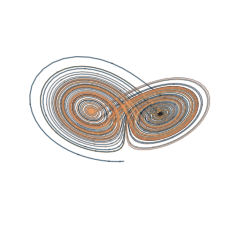

In [113]:
plot()

### Save Plot as PNG

Logos and favicons tend to look best when they blend in with wherever they are placed, so we'll output a PNG with transparent background and minimal padding

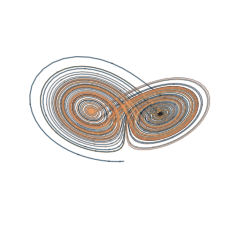

In [114]:
plot()
plt.savefig('logo.png', transparent=True, bbox_inches='tight', pad_inches=0)

Now I have a slick custom logo that can easily be copied into my website's `images` directory and injected into my pages. 

If you save a copy under [`favicon.ico`](https://en.wikipedia.org/wiki/Favicon) then browsers will automatically make your site look legit with a tiny version of your logo on tabs and bookmarks! 

## Shameless `fastpages` plug

I've got to say, the `fastpages` project is truly mind-blowing. Not only does it make deploying a personal blog free and practically effortless, the use of git and continuous deployment aligns well with my usual software engineering workflow.

If you're a coder looking for a simple blogging platform, definitely check out [fastpages](https://github.com/fastai/fastpages)!